### Importing 

In [57]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics,svm,tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


### Loading the Data

In [58]:
x,y=load_breast_cancer(return_X_y=True)


### Splitting the Data

In [59]:
x_train ,x_test ,y_train ,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

(398, 30) (171, 30) (398,) (171,)


### Training the Data

1) Naive Bayes

In [60]:
#We'll be using the GaussianNB
clf1=GaussianNB()
y_pred1=clf1.fit(x_train,y_train).predict(x_test)

#And now we count the misclassified labels
print("The number of mislabeled points out of %d is :%d \nAnd we have a precision of : %f %%" 
% (x_test.shape[0],(y_test!=y_pred1).sum(),100*metrics.accuracy_score(y_test,y_pred1)))

The number of mislabeled points out of 171 is :13 
And we have a precision of : 92.397661 %


2) SVM

In [61]:
clf2=svm.SVC(gamma="auto")
y_pred2=clf2.fit(x_train,y_train).predict(x_test)

#Calculating the accuracy
print("The number of mislabeled points out of %d is :%d \nAnd we have a precision of : %f %%" 
% (x_test.shape[0],(y_test!=y_pred2).sum(),100*metrics.accuracy_score(y_test,y_pred2)))

The number of mislabeled points out of 171 is :63 
And we have a precision of : 63.157895 %


3) Decision trees

In [62]:
clf3=tree.DecisionTreeClassifier(criterion='entropy')
y_pred3=clf3.fit(x_train,y_train).predict(x_test)

#Calculating the accuracy
print("The number of mislabeled points out of %d is :%d \nAnd we have a precision of : %f %%" 
% (x_test.shape[0],(y_test!=y_pred3).sum(),100*metrics.accuracy_score(y_test,y_pred3)))

The number of mislabeled points out of 171 is :9 
And we have a precision of : 94.736842 %


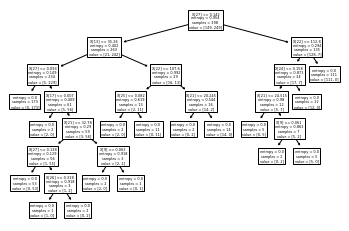

In [64]:
tree.plot_tree(clf3)
plt.show()

4) Random forests

In [56]:
clf4=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
y_pred4=clf4.fit(x_train,y_train).predict(x_test)

#Calculating the accuracy
print("The number of mislabeled points out of %d is :%d \nAnd we have a precision of : %f %%" 
% (x_test.shape[0],(y_test!=y_pred4).sum(),100*metrics.accuracy_score(y_test,y_pred4)))

The number of mislabeled points out of 171 is :8 
And we have a precision of : 95.321637 %


### Comparing the results

Putting our classifiers next to each other we can see that in term of descending accuracy our order is :
1)Random Forests
2)Decision Trees
3)Naive Bayes
4)SVM
We should also note that all our classifiers are very precise with an accuracy of over 90% except for the SVM one